In [ ]:
import tensorflow as tf
import keras

In [ ]:
CFAR10_Classes= {0: "airplane", 1: "car", 2: "bird", 3: "cat", 4: "deer", 5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dropout
from keras.layers.pooling.max_pooling2d import MaxPooling2D
from keras.layers.reshaping.flatten import Flatten
from keras.layers.convolutional.conv2d_transpose import Conv2D
from keras.layers.core.dense import Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), padding= 'same', input_shape= X_train[0].shape, activation= 'relu'))
model.add(Conv2D(32, (3, 3), activation= 'relu'))

model.add(MaxPooling2D(pool_size= (2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding= 'same', activation= 'relu'))
model.add(Conv2D(64, (3, 3), activation= 'relu'))

model.add(MaxPooling2D(pool_size= (2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation= 'relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [ ]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size= 32, epochs= 75, shuffle= True)

Epoch 1/75
1563/1563 [==============================] - 11s 6ms/step - loss: 1.5185 - accuracy: 0.4432
Epoch 2/75
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1304 - accuracy: 0.5982
Epoch 3/75
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9889 - accuracy: 0.6517
Epoch 4/75
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8958 - accuracy: 0.6846
Epoch 5/75
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8363 - accuracy: 0.7086
Epoch 6/75
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7892 - accuracy: 0.7240
Epoch 7/75
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7545 - accuracy: 0.7363
Epoch 8/75
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7146 - accuracy: 0.7484
Epoch 9/75
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6928 - accuracy: 0.7584
Epoch 10/75
1563/1563 [==============================] - 9s 6ms/step - loss: 0.66

In [ ]:
from keras.saving.legacy.model_config import model_from_json
from pathlib import Path
model_structure= model.to_json()
f= Path('/content/model_structue.json')
f.write_text(model_structure)

model.save_weights('/content/model_weights.h5')

# model_structure= f.read_text()
# model= model_from_json(model_structure)
# model.load_weights('/content/model_weights.h5')

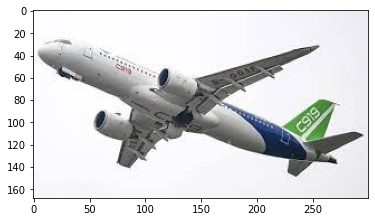

In [ ]:
import cv2
from matplotlib import pyplot as plt
our_test= cv2.imread('/content/airplane.jpg')
plt.imshow(cv2.cvtColor(our_test, cv2.COLOR_BGR2RGB))

In [ ]:
from keras.utils import load_img, img_to_array
import numpy as np
img= load_img('/content/airplane.jpg', target_size= (32, 32))
test_img= img_to_array(img)
list_test= np.expand_dims(test_img, axis=0)

In [ ]:
results= model.predict(list_test)
test_result= np.argmax(results[0])
answer= CFAR10_Classes[test_result]
print(f'This is an image of a/an " {answer} " with probability of {results[0][test_result]*100}%')

1/1 [==============================] - 0s 24ms/step
This is an image of a/an " airplane " with probability of 100.0%


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred= model.predict(X_test)
y_pred_class= np.argmax(y_pred, axis=1)
y_test_class= np.argmax(y_test, axis=1)
cnfsn_mtrx= confusion_matrix(y_test_class, y_pred_class)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(cnfsn_mtrx)

[[787  12  47  18  21   9  11   9  48  38]
 [  7 880   3   2   2   5   6   0  13  82]
 [ 47   4 660  39  92  74  58  14  10   2]
 [ 19   6  52 551  69 192  66  18  11  16]
 [ 14   1  39  37 783  30  39  46   6   5]
 [  3   1  33 107  34 759  23  30   1   9]
 [  4   2  27  24  33  20 881   5   3   1]
 [  8   3  25  13  31  62   8 838   3   9]
 [ 55  17  11  11   7   6   3   2 856  32]
 [ 19  31   4  13   1   1   3   7  12 909]]
